### Imports


In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Loading opinions from json file 

In [53]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

134359846
181461988
84514582


In [54]:
product_id = input("Enter product code please: ")

In [55]:
opinions = pd.read_json(f"./opinions/{product_id}.json")
opinions

,opinion_id,author,recommendation,stars,content,pros,cons,vote_yes,vote_no,published,purchased,content_en,pros_en,cons_en
0,12535429,g...6,NaN,3.0,Instalacja łatwa. Oprogramowanie HP Smart bezp...,"[czyste napełnianie atramentem, niski koszt wy...",[jakość wydruków],19,3,2020-05-28 08:02:51,2020-05-04 22:29:44,Easy installation. HP Smart software trouble -...,"[pure ink filling, low print cost, print speed...",[Print quality]
1,13551598,b...a,1.0,4.0,"Wykonana dobrze, trochę za duża, z ledwością m...","[czyste napełnianie atramentem, głośność pracy]",[],3,3,2020-12-10 19:41:04,2020-12-04 21:02:01,"Made well, a bit too big, it barely fits on my...","[pure ink filling, volume of work]",[]
2,18299406,U...o,1.0,4.5,Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,"[czyste napełnianie atramentem, jakość wydrukó...",[głośność pracy],0,0,2024-01-12 21:03:08,2024-01-09 18:20:01,After 1 day of use\n2-tank tank-attempt\n3-Mon...,"[pure ink filling, Print quality, Print qualit...",[volume of work]
3,15226709,k...l,1.0,4.0,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[],3,0,2021-11-18 17:47:41,2021-11-01 18:36:33,Everything in the description is correct. Very...,[],[]
4,13501735,g...k,NaN,3.5,produkt na wstępie nie ruszył bo był problem z...,"[jakość wydruków, jakość wydruku, szybkość wyd...",[głośność pracy],4,0,2020-12-04 00:11:48,2020-11-17 18:04:01,The product did not move at the beginning beca...,"[Print quality, Print quality, print speed]",[volume of work]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,13466015,w...d,0.0,1.0,badziew,[],[],1,0,2020-11-28 17:08:14,2020-10-28 14:03:29,crap,[],[]
82,15730485,b...o,0.0,2.0,POLECAM,[],[],0,0,2022-02-21 10:21:10,2022-02-14 08:19:16,I RECOMMEND,[],[]
83,15798075,b...o,0.0,0.5,polecam,[],[],0,1,2022-03-09 11:10:06,2022-03-08 11:01:43,I recommend,[],[]
84,11644241,Użytkownik Ceneo,0.0,1.0,Koszmar. Zmuszenie jej do wydruku graniczy z c...,[],[],3,1,2020-01-26 21:28:27,None,Nightmare. Forcing her to print borders on a m...,[],[]


### Basic statistics

In [56]:
opinions_count = opinions.shape[0]
average_rate = round(opinions["stars"].mean(), 1)
pros_count = opinions["pros"].astype(bool).sum()
cons_count = opinions["cons"].astype(bool).sum()
pros_cons_count = opinions.apply(lambda x: bool(x["pros"]) and bool(x["cons"]), axis=1).sum()



print("Number of opinions:", opinions_count)
print("The average rate for the prodcut is:", average_rate)
print("Number of opinions in which adventages have been listed: ", pros_count)
print("Number of opinions in which disadventages have been listed: ", cons_count)
print("Number of both opinions in which disadventages and advantages have been listed: ", pros_cons_count)

Number of opinions: 86
The average rate for the prodcut is: 4.4
Number of opinions in which adventages have been listed:  40
Number of opinions in which disadventages have been listed:  10
Number of both opinions in which disadventages and advantages have been listed:  8


In [57]:
pros = opinions["pros_en"].explode().value_counts()
cons = opinions["cons_en"].explode().value_counts()

print(pros)
print(cons)
#

pros_en
Print quality          62
print speed            33
volume of work         23
efficiency             15
pure ink filling       11
efficient              10
low print cost          9
cheap ink               4
Printing via e-mail     3
modernity               3
excellent design        2
innovation              2
Document feeder         1
It takes few places     1
Name: count, dtype: int64
cons_en
volume of work    7
Print quality     5
print speed       4
Name: count, dtype: int64


In [58]:
pros

pros_en
Print quality          62
print speed            33
volume of work         23
efficiency             15
pure ink filling       11
efficient              10
low print cost          9
cheap ink               4
Printing via e-mail     3
modernity               3
excellent design        2
innovation              2
Document feeder         1
It takes few places     1
Name: count, dtype: int64

### Charts

In [60]:
recommendations = opinions["recommendation"].value_counts(dropna=False)
recommendations

recommendation
1.0    73
0.0     7
NaN     6
Name: count, dtype: int64

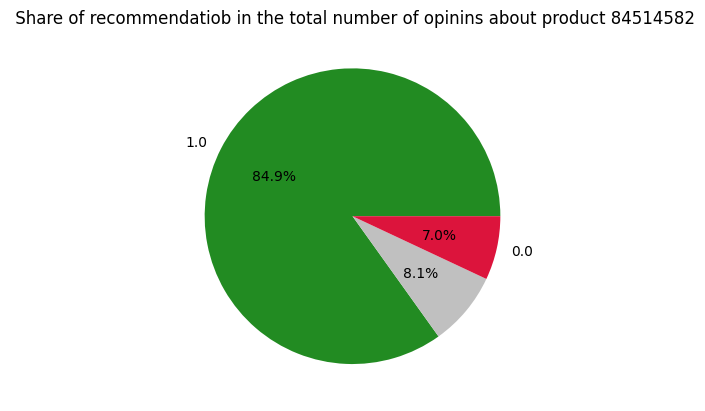

In [70]:
recommendations.plot.pie(
    title = f" Share of recommendatiob in the total number of opinins about product {product_id}",
    labels =  {1.0 : "Recommend", None: "No info", 0.0: "No recommend"},
    label = "",
    autopct = lambda x: f"{x:.1f}%" if x > 0 else "",
    colors = ["forestgreen", "silver", "crimson"],
)

plt.show()